In [1]:
from sklearn import datasets, linear_model, metrics
import scipy
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x,y  = datasets.make_regression(n_features=1,noise=16,n_samples=100, random_state=244810)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [4]:
Y = y
X = np.concatenate((np.ones((len(x),1)), x), axis=1)

### Metoda numeryczna

### $$ L(θ) = \frac{1}{N}(Y - X^T θ)^{T} (Y - X^T θ) $$

In [5]:
def func(w, X, Y):
    yxtans = np.subtract(np.reshape(Y,(len(Y),1)), np.matmul(X, np.transpose(np.reshape(w,(1,2)))))
    yxtansyxtans = np.matmul(np.transpose(yxtans),yxtans)
    return yxtansyxtans*(1/len(X_train))
    

In [6]:
ans_num = scipy.optimize.minimize(func,[1,1], args=(X,Y),method="Powell")

In [7]:
print(ans_num.x[0])

[ 0.59277057 52.88411096]


### Metoda analityczna

### $$ θ = (X^T X)^{-1} X^T Y $$

In [8]:
#rozbite na części
#X^T Y
xty = np.matmul(np.transpose(X),Y)
#X^T X
xtx = np.matmul(np.transpose(X),X)
#(X^T X)^-1
xtxinv =np.linalg.inv(xtx)
#answer
ans = np.matmul(xtxinv,xty)


In [9]:
#jedna funkcja
ans_ana = np.matmul(np.linalg.inv(np.matmul(np.transpose(X),X)),np.matmul(np.transpose(X),Y))

In [10]:
print(ans_ana)

[ 0.59277057 52.88411096]


### Wykres

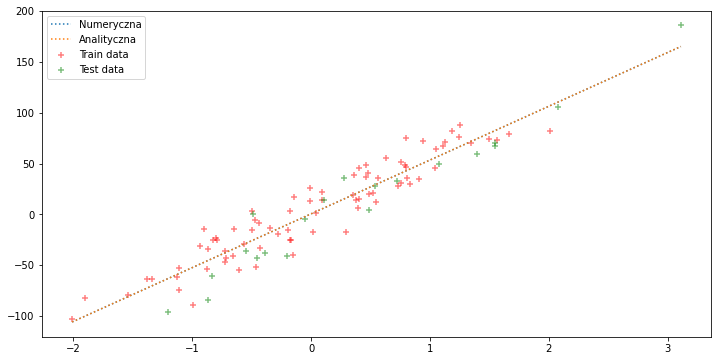

In [11]:
plt.figure(figsize=(12,6))

plt.scatter(X_train,y_train, color='red', alpha=0.5, marker='+', label="Train data")
plt.scatter(X_test,y_test, color='green', alpha=0.5, marker='+', label="Test data")

plt.plot([min(x),max(x)], [ans_num.x[0][1]*min(x)+ans_num.x[0][0] , ans_num.x[0][1]*max(x)+ans_num.x[0][0]], label="Numeryczna", linestyle=":" )

plt.plot([min(x),max(x)], [ans_ana[1]*min(x)+ans_ana[0] , ans_ana[1]*max(x)+ans_ana[0]], label="Analityczna", linestyle=":" )

plt.legend()



#### MSE dla danych testowych

In [12]:
y_pred_an = np.empty(len(y_test))

for i in range(len(y_test)):
    y_pred_an[i] = ans_ana[1]*X_test[i][0]+ans_ana[0]

MSE_an = np.square(np.subtract(y_test, y_pred_an )).mean()

In [13]:
y_pred_num = np.empty(len(y_test))

for i in range(len(y_test)):
    y_pred_num[i] = ans_num.x[0][1]*X_test[i][0]+ans_num.x[0][0]

MSE_num = np.square(np.subtract(y_test, y_pred_num )).mean()

In [14]:
print("MSE dla metody numerycznej:",MSE_num)
print("MSE dla metody analitycznej:",MSE_an)

MSE dla metody numerycznej: 365.55480377127657
MSE dla metody analitycznej: 365.5548037958898
